In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [8]:
immigrants = pd.read_csv('data/immigrants.txt', sep=' ')
immigrants.head()

,recode,count,has_bachelor_degree,personal_income,gdp_per_capita_ppp
0,AFGHANISTAN,97,0.137790,15993.768688,1900.0
1,ALBANIA,64,0.464029,39001.692212,12500.0
2,AMERICAN SAMOA,61,0.189209,54641.765288,13000.0
3,ANTIGUA AND BARBUDA,52,0.220404,17367.445445,26300.0
4,ARGENTINA,307,0.385300,40062.179222,20700.0


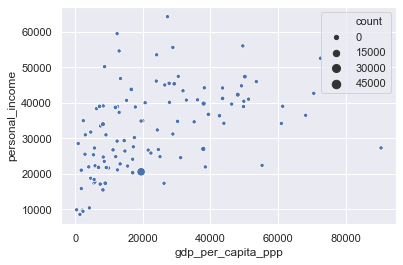

In [53]:
sns.scatterplot(x = 'gdp_per_capita_ppp', y = 'personal_income', data=immigrants, size='count')

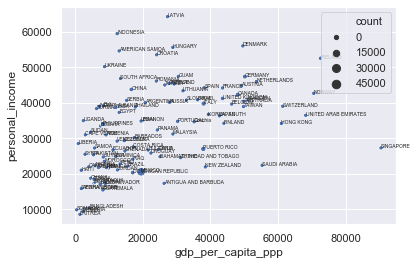

In [60]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']), fontsize=5)

g = sns.scatterplot(x = 'gdp_per_capita_ppp', y = 'personal_income', data=immigrants, size='count')
label_point(immigrants.gdp_per_capita_ppp, immigrants.personal_income, immigrants.recode, g)

#### Not a perfect solution with variable size on lmplot

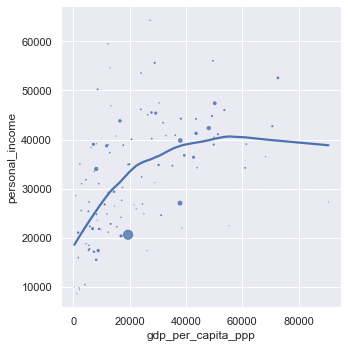

In [54]:
immigrants['c'] = immigrants['count'] / np.sum(immigrants['count']) * 250
sns.lmplot(x = 'gdp_per_capita_ppp', y = 'personal_income', data=immigrants, lowess=True, scatter_kws={'s':immigrants['c']})

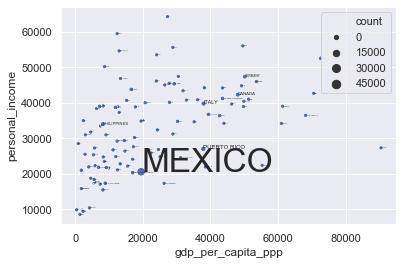

In [49]:
immigrants['c'] = immigrants['count'] / np.sum(immigrants['count']) * 100
def label_point(x, y, val, ax, s):
    a = pd.concat({'x': x, 'y': y, 'val': val, 's': s}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']), fontsize=point['s'])

g = sns.scatterplot(x = 'gdp_per_capita_ppp', y = 'personal_income', data=immigrants, size='count')
label_point(immigrants.gdp_per_capita_ppp, immigrants.personal_income, immigrants.recode, g, immigrants.c)

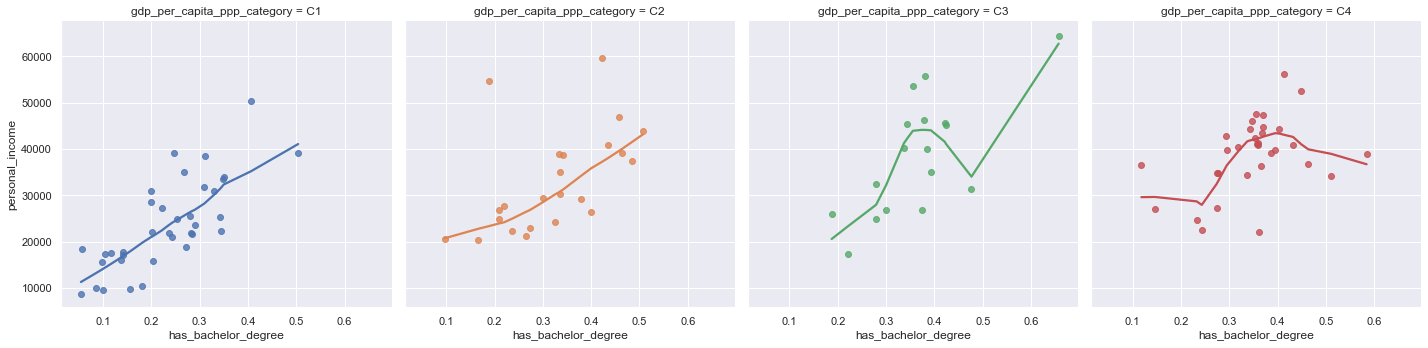

In [77]:
def set_value(curr_row_value):
    if curr_row_value < 10000:
        return 'C1'
    elif curr_row_value < 20000:
        return 'C2'
    elif curr_row_value < 30000:
        return 'C3'
    else:
        return 'C4'

# .apply will be called for every row and set_value function will be applied
immigrants["gdp_per_capita_ppp_category"] = immigrants["gdp_per_capita_ppp"].apply(set_value)
# immigrants.head()
# g = sns.FacetGrid(data=immigrants, col="gdp_per_capita_ppp_category", col_wrap=3)
# g.map(sns.scatterplot, x = 'has_bachelor_degree', y = 'personal_income', data=immigrants, size='count')
sns.lmplot(x = 'has_bachelor_degree', y = 'personal_income', 
           data=immigrants, hue='gdp_per_capita_ppp_category', col='gdp_per_capita_ppp_category', lowess=True)
